In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
filepath = '/Users/lindaberg/Downloads/country_vaccinations.csv'
covid19 = pd.read_csv(filepath)
covid19.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [94]:
# converting dates to format datetime
covid19.date = pd.to_datetime(covid19['date'])

In [95]:
# getting an overview about the dataset
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              2555 non-null   object        
 1   iso_code                             2318 non-null   object        
 2   date                                 2555 non-null   datetime64[ns]
 3   total_vaccinations                   1667 non-null   float64       
 4   people_vaccinated                    1355 non-null   float64       
 5   people_fully_vaccinated              805 non-null    float64       
 6   daily_vaccinations_raw               1368 non-null   float64       
 7   daily_vaccinations                   2458 non-null   float64       
 8   total_vaccinations_per_hundred       1667 non-null   float64       
 9   people_vaccinated_per_hundred        1355 non-null   float64       
 10  people_fully

In [96]:
covid19.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.667000e+03,1.355000e+03,8.050000e+02,1.368000e+03,2.458000e+03,1667.000000,1355.000000,805.000000,2458.000000
mean,1.155910e+06,1.088554e+06,2.673779e+05,6.840427e+04,5.270961e+04,4.551236,4.123277,1.083106,1963.575671
std,3.769872e+06,3.485441e+06,9.166440e+05,1.922317e+05,1.541405e+05,8.736379,7.129699,3.135065,3542.616726
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.576300e+04,2.478850e+04,5.077000e+03,2.018750e+03,1.331750e+03,0.450000,0.490000,0.060000,329.250000
50%,1.405610e+05,1.352490e+05,2.093800e+04,1.050800e+04,6.263000e+03,1.700000,1.820000,0.350000,918.500000
75%,6.144625e+05,5.593805e+05,1.037860e+05,5.312025e+04,2.747275e+04,3.895000,3.225000,0.830000,1653.500000
max,4.241762e+07,3.234015e+07,9.518015e+06,2.218752e+06,1.456459e+06,65.830000,40.910000,24.920000,30869.000000


In [97]:
# examine missing values.
missing_values = covid19.isnull().sum()
missing_values

country                                   0
iso_code                                237
date                                      0
total_vaccinations                      888
people_vaccinated                      1200
people_fully_vaccinated                1750
daily_vaccinations_raw                 1187
daily_vaccinations                       97
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1200
people_fully_vaccinated_per_hundred    1750
daily_vaccinations_per_million           97
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [98]:
# what countries are included in the dataset?
list_of_countries = [i for i in covid19.country.unique()]

# create a list of scandinavian countries for later investigation
scandinavian_countries = ['Denmark', 'Norway', 'Sweden', 'Finland', 'Denmark']

# ensuring all scandinavian countries are included in our dataset
for country in scandinavian_countries:
    if country in list_of_countries:
        print('yes, {} is in the list.' .format(country))
    else:
        print('no, {} in not in the list.' .format(country))

yes, Denmark is in the list.
yes, Norway is in the list.
yes, Sweden is in the list.
yes, Finland is in the list.
yes, Denmark is in the list.


In [99]:
# what vaccines are used in each country? 
vaccines_used = covid19.groupby('country').vaccines.unique().apply(list).to_dict()
for v in vaccines_used:
    print("Vaccines used in", v + ":")
    for item in vaccines_used[v]:
        print(item)
    print("\n")

Vaccines used in Algeria:
Sputnik V


Vaccines used in Andorra:
Pfizer/BioNTech


Vaccines used in Argentina:
Sputnik V


Vaccines used in Austria:
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech


Vaccines used in Bahrain:
Pfizer/BioNTech, Sinopharm/Beijing


Vaccines used in Bangladesh:
Oxford/AstraZeneca


Vaccines used in Belgium:
Moderna, Pfizer/BioNTech


Vaccines used in Bermuda:
Pfizer/BioNTech


Vaccines used in Bolivia:
Sputnik V


Vaccines used in Brazil:
Oxford/AstraZeneca, Sinovac


Vaccines used in Bulgaria:
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech


Vaccines used in Canada:
Moderna, Pfizer/BioNTech


Vaccines used in Cayman Islands:
Pfizer/BioNTech


Vaccines used in Chile:
Pfizer/BioNTech, Sinovac


Vaccines used in China:
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac


Vaccines used in Costa Rica:
Pfizer/BioNTech


Vaccines used in Croatia:
Pfizer/BioNTech


Vaccines used in Cyprus:
Pfizer/BioNTech


Vaccines used in Czechia:
Moderna, Pfizer/BioNTech


Vaccines used in 

<AxesSubplot:xlabel='vaccines', ylabel='count'>

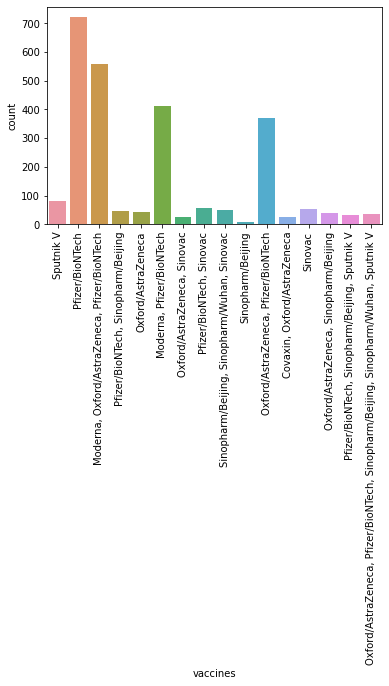

In [100]:
# most used vaccine scheme
chart = sns.countplot(x='vaccines', data=covid19)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

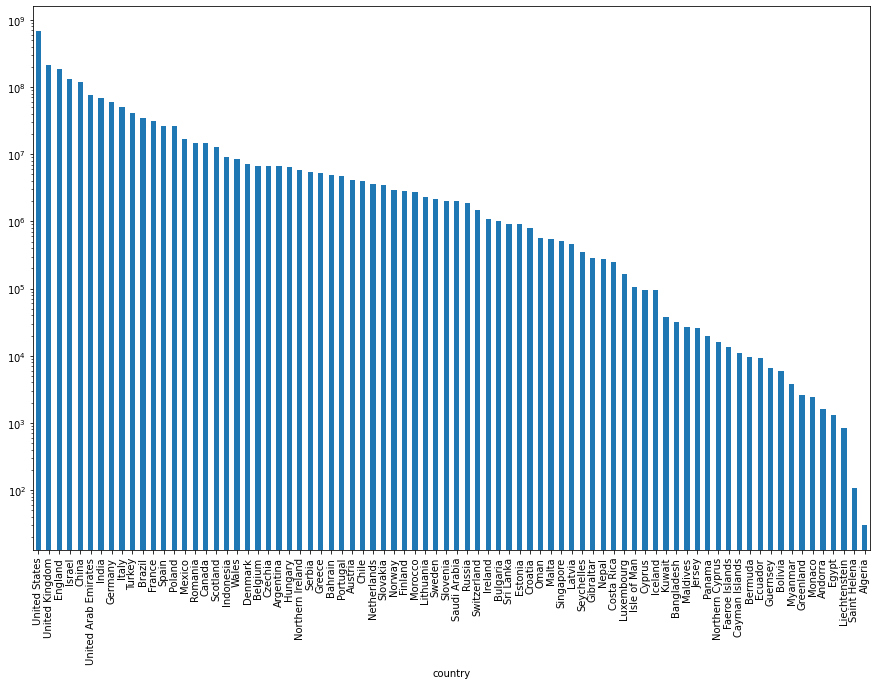

In [101]:
# how many people are vaccinated around the world, based on different features?
def total_vaccinations_chart(feature):
    fig_dims = (15, 10)
    fig, ax = plt.subplots(figsize=fig_dims)
    covid19.groupby('country')[feature].sum().sort_values(ascending=False).plot(kind='bar', ax=ax)
    plt.yscale('log')

# total number of vaccinations per country
total_vaccinations_chart('total_vaccinations')

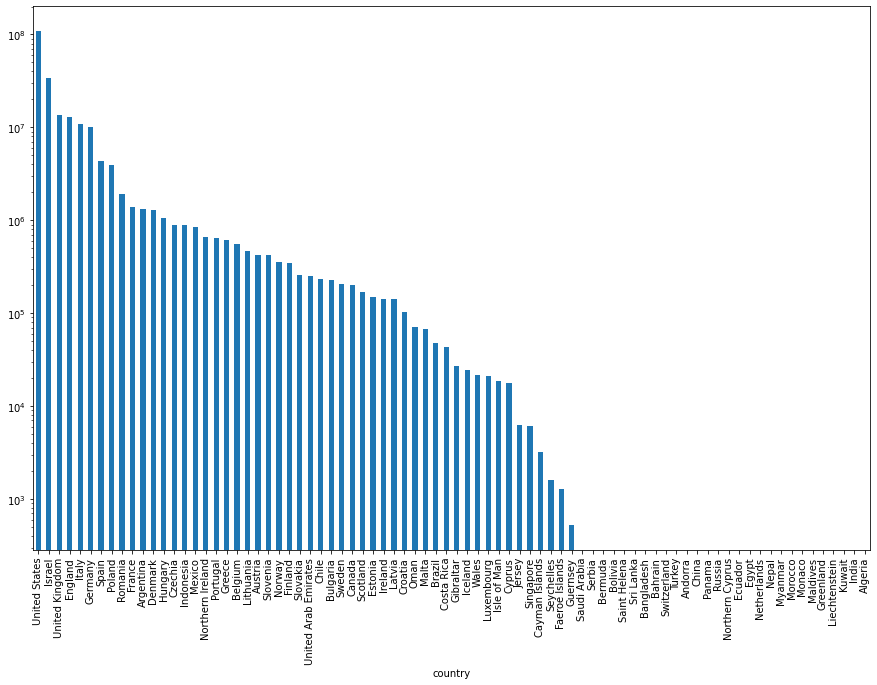

In [102]:
# total number of people fully vaccinated per country 
total_vaccinations_chart('people_fully_vaccinated')

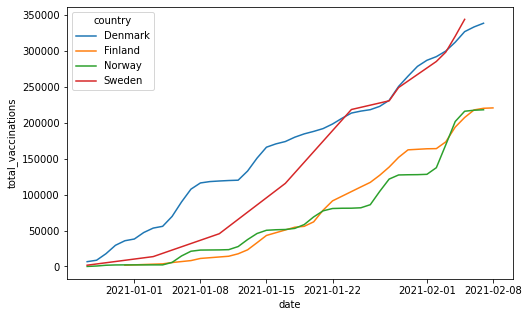

In [103]:
# what is the vaccination progress over time in Scandinavia, based on different features?
def vaccination_progress_scandinavia(column):
    scandinavia = covid19.loc[covid19.country.isin(scandinavian_countries)].loc[:, ['country', 'date', column]].dropna()
    fig, ax = plt.subplots(figsize = (8,5))  
    fig = sns.lineplot(data=scandinavia, x='date', y=column, hue='country', ax=ax)
    # activate for logaritmic scale
    #fig.set(yscale='log')

vaccination_progress_scandinavia('total_vaccinations')

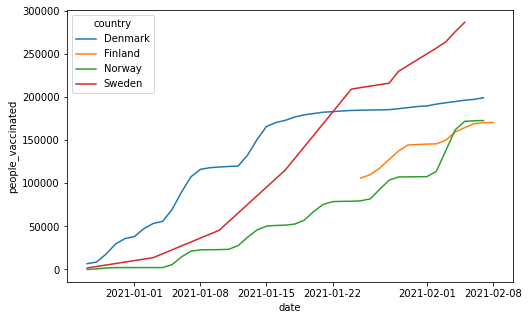

In [104]:
vaccination_progress_scandinavia('people_vaccinated')